In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from config import google_api_key
import gmaps
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv('Final Data.csv')

In [3]:
bins = [0,500000,1000000,1500000, 99999999]
binnames = ['<500k','500k to 1M','1M to 1.5M','1.5M+']
df['Home Price Group'] = pd.cut(df['Median Home Price'],bins,labels=binnames)
df.head()

,ZipCode,Weighted 3 Year Average API,Median Home Price,Latitude,Longitude,Home Price Group
0,90001,796.00,267100.0,33.974510,-118.248392,<500k
1,90002,515.00,254500.0,33.949005,-118.245834,<500k
2,90003,621.00,279900.0,33.963746,-118.273905,<500k
3,90004,690.67,1094300.0,34.076131,-118.310856,1M to 1.5M
4,90005,671.25,685100.0,34.060034,-118.310230,500k to 1M


In [4]:
dfunder500k = df.loc[df['Home Price Group'] == binnames[0]]
df500kto1M = df.loc[df['Home Price Group'] == binnames[1]]
df1Mto15M = df.loc[df['Home Price Group'] == binnames[2]]
dfover15M = df.loc[df['Home Price Group'] == binnames[3]]

In [5]:
boxplotdata = [dfunder500k['Weighted 3 Year Average API'],df500kto1M['Weighted 3 Year Average API'],
               df1Mto15M['Weighted 3 Year Average API'], dfover15M['Weighted 3 Year Average API']]

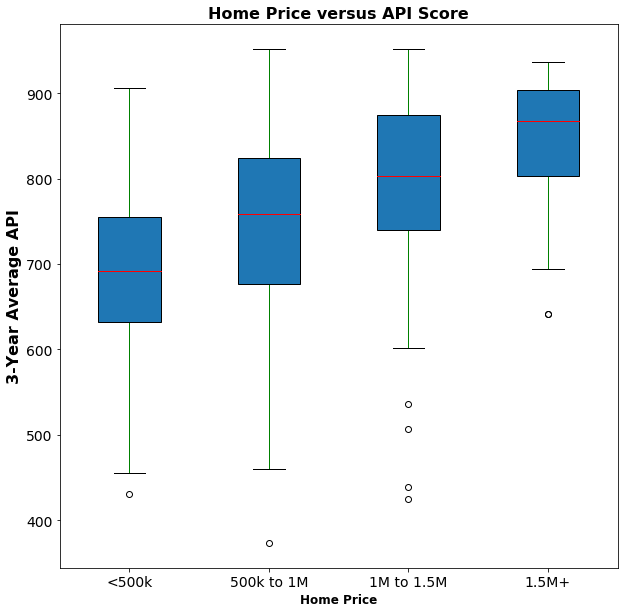

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
bp = ax.boxplot(boxplotdata, patch_artist=True);
ax.set_xticklabels(binnames)
ax.set_title('Home Price versus API Score',fontsize=16, fontweight="bold");
ax.set_ylabel('3-Year Average API',fontsize=16, fontweight="bold");
ax.set_xlabel('Home Price',fontsize=12, fontweight="bold")
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
plt.setp(bp['medians'], color = 'red');
plt.setp(bp['whiskers'], color = 'green');
plt.savefig('BoxPlot.png')

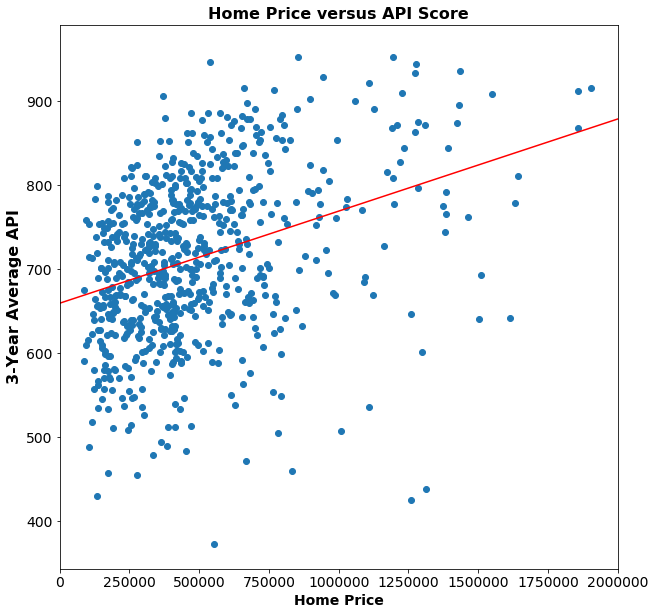

In [7]:
plt.subplots(1,figsize=(10,10));
plt.scatter(df['Median Home Price'],df['Weighted 3 Year Average API']);
plt.xlim(0, 2000000);
plt.title('Home Price versus API Score',fontsize=16, fontweight="bold");
plt.ylabel('3-Year Average API',fontsize=16, fontweight="bold");
plt.xlabel('Home Price',fontsize=14, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)

def regressionline(x):
    y = stats.linregress(df["Median Home Price"],df['Weighted 3 Year Average API']).intercept + stats.linregress(df["Median Home Price"],df['Weighted 3 Year Average API']).slope * x
    return y

z = np.arange(0,3000000,250000);
y = [regressionline(x) for x in z];
regline = plt.plot(z,y);
plt.setp(regline, color = 'red');
plt.savefig('ScatterPlot.png')

In [8]:
stats.f_oneway(dfunder500k['Weighted 3 Year Average API'],df500kto1M['Weighted 3 Year Average API'],
               df1Mto15M['Weighted 3 Year Average API'], dfover15M['Weighted 3 Year Average API'])

F_onewayResult(statistic=35.39502957375557, pvalue=2.54032482072558e-21)

In [9]:
stats.linregress(df["Median Home Price"],df['Weighted 3 Year Average API'])

LinregressResult(slope=0.00010956626925460734, intercept=659.5308215781369, rvalue=0.3874000889052122, pvalue=6.516729445516486e-27, stderr=9.785371256700406e-06)